# Impact of Walt Hickey's report on Fandango's Movie Rating System

## Introduction:
[Fandango](https://www.fandango.com/) is an online movie rating aggregator. 
![fandango](Fandango_2014.svg.png)

In October 2015, A Data journalist named Walt Hickey foung strong evidence that the movie rating system was biased. [Here is the link to his article](https://fivethirtyeight.com/features/fandango-movies-ratings/)

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

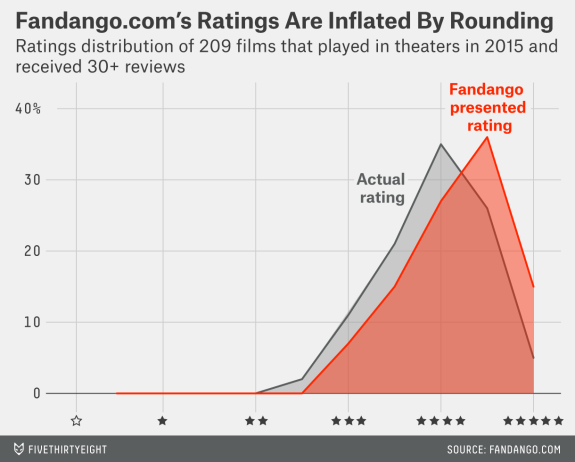
>The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.
    Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.
## Goal:
In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis

### Approach
To see whether there has been any change in Fandango's rating system after Hickey's analysis, we will compare the system's characterstics previous and after the analysis, as, fortunately, we have ready made data for both these periods of time 
Fortunately, we have ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available on Github [here](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on GitHub [here](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

You can find the documentation of both data sets in the GitHub repositories we linked to above.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Adjust View Settings to view all columns 
pd.options.display.max_columns = 100

## Loading Datasets
As we have two datasets; one is of situation `before` Hickey's Article and other that is `after` his article
- before : data before the analysis
- after : data after the analysis

In [6]:
before = pd.read_csv('fandango_score_comparison.csv')
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [7]:
after = pd.read_csv('movie_ratings_16_17.csv')
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [8]:
before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [9]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


## Selection of Columns 
Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use. 
After analysing the documentations on both datasets, I think the following columns are of interest to our project.
#### In the data previous to his analysis, 
|Column|Description|
|:-----|:----------|
|FILM|The film in question.|
|Fandango_Stars|The number of stars the film had on its Fandango movie page.|
|Fandango_Ratingvalue|The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.|
|Fandango_votes|The number of user votes the film had on Fandango.|
|Fandango_Difference|The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue.|

#### In the data after his analysis
|Column|Description|
|:-----|:----------|
|movie|the name of the movie.|
|year|the release year of the movie.|
|fandango|the Fandango rating of the movie (user score).|

Lets isolate the columns and name the resulting dataframes as
- `bdata`: Previous to his analysis
- `adata`: Post his analysis

In [10]:
# Isolating the data with columns I am interested in
bdata = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                'Fandango_votes', 'Fandango_Difference']]
adata = after[['movie', 'year', 'fandango']]

---

##  Are these two samples representatives for the population we're trying to describe?
Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?
#### Defining the population of interest for our project's goal.

As we are working with the samples, the two samples should represent the population we're trying to describe. Much information is given in the ReadMe files [ReadMe for previous](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [ReadMe for post](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) of both datasets as well as the [Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/)



##### In our data prior to Hickey's Analysis i-e, before 2015, 
The conditions were:
- a Rotten Tomatoes rating, an RT User rating, a Metacritic score, a Metacritic User score, and an IMDb score,
- at least 30 fan reviews on Fandango,
- tickets on sale in 2015.

Some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to *temporal trends* — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

##### The sampling conditions for our sample of the Data after Hickey's Analysis i-e after 2016 are:
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data),
- released in 2016 and 2017.
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

We can see that not all the movies had an equal chance to be included in the two samples. Therefore, the resulting samples are very unlikely to be representative of the entire population of interest.
Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). This means that the **sampling process in both cases was subjectively selective rather than random**. While these samples were good enough for their research, they don't seem too useful for us.

**Conclusion**:
The sampling was clearly not random because not every movie had the same chance to be included in the sample 



**At this point, we have at least two alternatives:**
- either we collect new data, 
- or we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

**Change slightly the current goal of our analysis such that:**

- The population of interest changes and the samples we currently work with become representative.
- The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

### So the new goal is that
><font color = 'Green'> **We'll determine whether there are any changes in Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.**

This would be a fairly good proxy for the Fandango's rating system after Hickey's analysis.

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings he used in `bdata` and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

**Checking Sample Representativity:**

One way to check the representativity of `adata` sample is to sample randomly some movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.


In [14]:
adata.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of the time of doing this analysis, 01-06-2021, we could manually find following number of ratings:

|Movie Name| Number of Ratings as of today|
|:---------|:--------|
|Mechanic: Resurrection| 25,000+|	
|Warcraft| 25,000+|
|Max Steel| 5,000+|
|Me Before You| 25,000+|
|Fantastic Beasts and Where to Find Them| 50,000+|
|Cell| 2,500+|
|Genius| 2,500+|
|Sully| 25,000+|
|A Hologram for the King| 10,000+|
|Captain America: Civil War| 100,000+|

- We can see that each movie that came out in this 10 movie sample is extravagantly above the benchmark of 30 reviews. We can be sure of its representativity

Moving on, lets cross check that `bdata` doesn't have
- any film with rating less than 30
- film are of year 2015

In [18]:
# recheck if there are atleast 30 votes for each movies in the data of 2015 movies
bdata[bdata['Fandango_votes'] < 30].shape[0]

0

Next, let's check what years of release are represented in both dataframes. `bdata` doesn't have a column for release year, but the year can be extracted from the FILM column

In [32]:
bdata['FILM'].str[-6:] # Using vectorized string method to get the last 6 characters of data in column 'FILM'

0      (2015)
1      (2015)
2      (2015)
3      (2015)
4      (2015)
        ...  
141    (2015)
142    (2015)
143    (2014)
144    (2015)
145    (2015)
Name: FILM, Length: 146, dtype: object

In [35]:
print('Total number of movies from year 2015:', bdata['FILM'].str[-6:].
      str.contains('2015').sum()) # This will show us the total number of movies from year 2015

Total number of movies from year 2015: 129


In [42]:
print('Percentage of 2015 movies in all movies in bdata:',
      bdata['FILM'].str[-6:].str.contains('2015').sum()/len(bdata['FILM']))

Percentage of 2015 movies in all movies in bdata: 0.8835616438356164


In [45]:
# It will be much better if we make a new column of year of release
bdata['year'] = bdata['FILM'].str[-6:].str.replace('(', '').str.replace(')','')
bdata['year'].value_counts(normalize=True)

<ipython-input-45-9ac55c4eb2fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdata['year'] = bdata['FILM'].str[-6:].str.replace('(', '').str.replace(')','').copy()


2015    0.883562
2014    0.116438
Name: year, dtype: float64

To comply with our new goal, we just need 2015's movies. So lets filter out the movies that were not released in 2015

In [50]:
bdata_2015 = bdata[bdata['year'] == '2015']

In [52]:
bdata_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

Lets use the similar cross check over `adata`too. Fortunately, we do have an year column here

In [56]:
adata['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

- We have 23 movies those need to be omitted to restrict our sample to only year 2016

In [59]:
adata_2016 = adata[adata['year'] == 2016]
adata_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

### Comparison between the ratings of 2015 and 2016

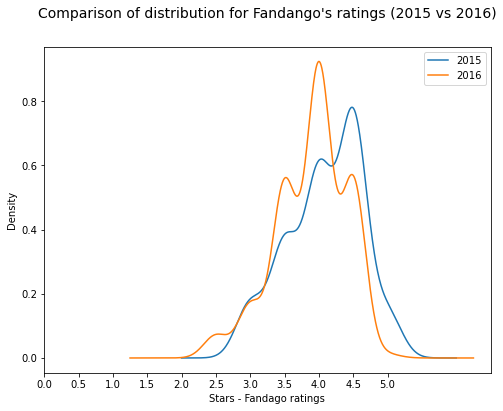

In [73]:
bdata_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,6))
adata_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.xlabel('Stars - Fandago ratings')
plt.legend()
plt.title('Comparison of distribution for Fandango\'s ratings (2015 vs 2016)',
          y = 1.07, fontsize=14) # the `y` parameter pads the title upward
plt.xticks(np.arange(0,5.1,.5))
plt.show()

Text(0.5, 1.07, "Comparison of distribution for Fandango's ratings (2015 vs 2016)")

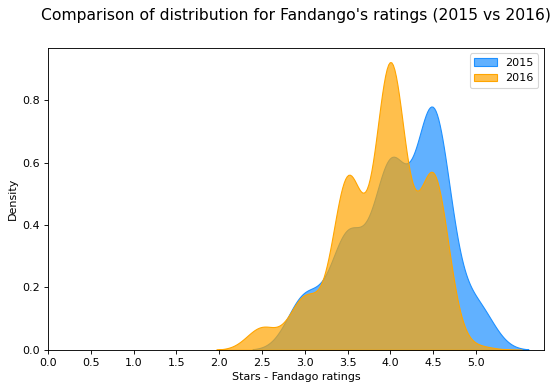

In [74]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(bdata_2015['Fandango_Stars'], shade=True, color='dodgerblue', label='2015', alpha=.7)
sns.kdeplot(adata_2016['fandango'], shade=True, color='orange', label='2016', alpha=.7)
plt.xlabel('Stars - Fandago ratings')
plt.xticks(np.arange(0,5.1,.5))
plt.legend()
plt.title('Comparison of distribution for Fandango\'s ratings (2015 vs 2016)',
          y = 1.07, fontsize=14) # the `y` parameter pads the title upward

**Observations:**

- Both distributions are left skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
- The mode of 2015's distribution is around 4.5 and the mode of 2016's distribution is around 4.0

The slight left shift of the 2016 distribution suggests that there was a difference indeed between Fandango's ratings for popular movies for 2015 and 2016.



The kernel density plots also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

we now need to analyze more granular information.

### Examining the frequency distribution tables of the two distributions

In [76]:
rating2015 = bdata_2015['Fandango_Stars'].value_counts(normalize=True)*100
rating2016 = adata_2016['fandango'].value_counts(normalize=True)*100
comparison = pd.concat([rating2015, rating2016], axis=1)
comparison.rename(columns = {'Fandango_Stars': 'Ratings in 2015',
                             'fandango': 'Ratings in 2016'}, 
                 inplace=True)
comparison['Difference'] = comparison['Ratings in 2016'] - comparison['Ratings in 2015']
comparison

,Ratings in 2015,Ratings in 2016,Difference
2.5,NaN,3.141361,NaN
3.0,8.527132,7.329843,-1.197289
3.5,17.829457,24.083770,6.254312
4.0,28.682171,40.314136,11.631966
4.5,37.984496,24.607330,-13.377166
5.0,6.976744,0.523560,-6.453184


**Observations:**

- In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015 (-13.40% and -6.50% correspondingly)
- In contrast, movies with less higher rankings (3.5 and 4.0) significantly increased by +6.25% and +11.60% respectively.
- In 2016, we have got ratings of 2.5 as the new minimum. In 2015, we had ratings of 3.0 at minimum. The ratings of 2.5 in 2016 are introduced by +3.14%
- The ratings of 3 were slightly reduced in 2016. However, the difference is aorund -1%


### Determining the Direction of the Change
We confirmed with the table before that there is indeed a clear difference between the two distributions. Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.


In [13]:
mean_2015 = bdata['Fandango_Stars'].mean()
mean_2016 = adata['fandango'].mean()

median_2015 = bdata['Fandango_Stars'].median()
median_2016 = adata['fandango'].median()

mode_2015 = bdata['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = adata['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.089041,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


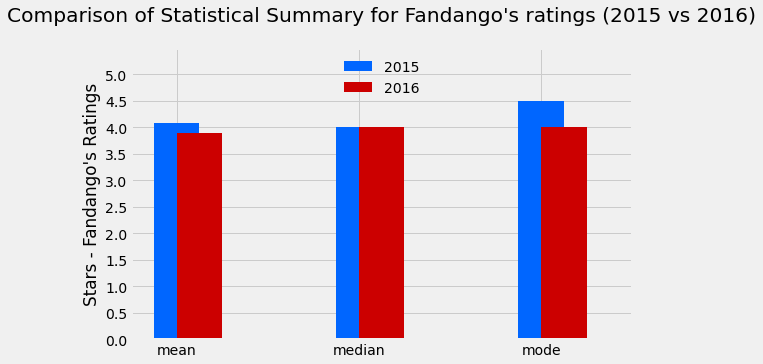

In [14]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparison of Statistical Summary for Fandango\'s ratings (2015 vs 2016)', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars - Fandango\'s Ratings')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

**Observations**
- In 2016, the mean has decreased by 0.2-0.4 points of ratings.
- The median remained the same as it was in 2015.
- The mode saw starkest change among the measures of central tendecies by having dropped with 0.5 points of rating.

It can be seen that Fandango's rating system has been improved to some extent. The difference is not very clear but there is an indication of Hickey's article impact over the Fandango's Movie Ratings System

## Conclusion:
Based on comparing the ratings that movies recieved in 2015 and 2016 and using this comparison as a proxy to investigate the impact of Hickey's Analysis impact over Fandango, here are our insights
- The shape of Fandango's ratings distributions was less skewed for 2016 than it was in 2015.
- In 2016, there are less movies with higher ratings as there were in 2015, In contrast, there are more movies that are rated lower in 2016 than in 2015.
- Although the median remains the same, but mean and mode significantly decreased for 2016.

Fandango ratings systems did see a change after the Hickey's Article. But we are still unsure of what exactly caused that change. 

